In [1]:
import cv2
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

# Create a gallery and query set

The *gallery* contains the images that are used as a reference. We know the class name of each image in the gallery. The images in the *query* set will be compared with the images in the gallery. We can predict the class name of a query by looking for the best match in the gallery.

In [2]:
def get_gallery_and_queries_for_class(class_name):
    """
    Return the gallery image and query images for a certain class.
    """
    # All images from the give class
    img_paths = [str(img_path) for img_path in Path('data/sodas/').glob(f'{class_name}/*.jpg')]
    
    # We use the first image as a reference
    gallery_img_path = img_paths.pop(0)
    gallery_img = cv2.imread(gallery_img_path)[..., ::-1]

    # The other images are used as queries
    query_imgs = [
        cv2.imread(img_path)[..., ::-1]
        for img_path in img_paths
    ]

    return gallery_img, query_imgs


def get_gallery_and_queries():
    gallery_labels = [
        'CocaCola2L',
        'Pepsi2L',
        'Fanta2L',
        'Sprite2L'
    ]
    
    gallery = []
    queries = []

    for label in gallery_labels:
        g_img, q_imgs = get_gallery_and_queries_for_class(label)
        gallery.append(g_img)
        queries.extend(q_imgs)
    
    return gallery, queries, gallery_labels

In [3]:
gallery, queries, gallery_labels = get_gallery_and_queries()

# Visualize the opponent color histogram of each gallery image

If you want an interactive 3D-plot, uncomment `%matplotlib notebook` in the notebook cell below.

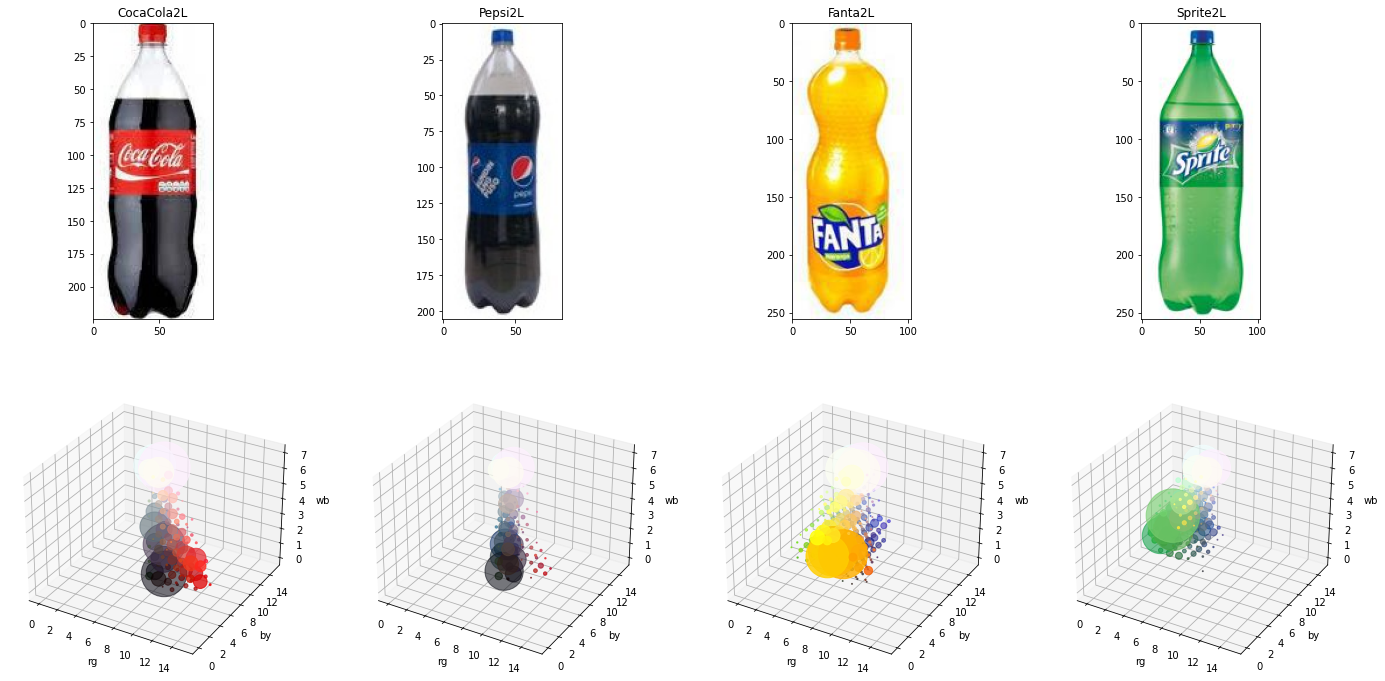

In [4]:
# %matplotlib notebook

from lib.histogram_comparison import calc_opp_color_hist, plot_imgs_with_opp_color_hist

# Calculate the opponent histogram of each gallery image
g_hists = [calc_opp_color_hist(img) for img in gallery]

# Visualize
plot_imgs_with_opp_color_hist(gallery, g_hists, gallery_labels)

# Calculate a similarity matrix using opponent histograms

To find the matches, we first calculate a **similarity matrix**. This contains the similarity between each possible gallery-query pair.

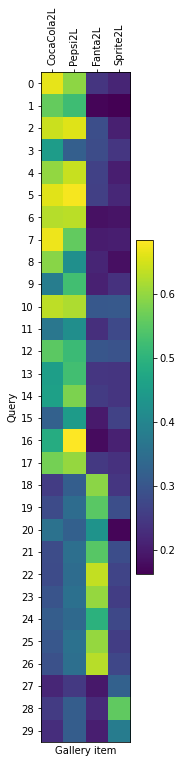

In [5]:
from lib.histogram_comparison import match_opp_color_hist
from lib.plots import plot_sim_mat

sim_mat = match_opp_color_hist(gallery, queries)

plot_sim_mat(sim_mat, gallery_labels)

As you can see, each row in the similarity matrix has the **same amount of rows as the number of queries** and the **same amount of columns as the number of gallery items**.

# Find the best match for each query

The best match is the match with the highest similarity score. With `argmax(axis=1)`, we obtain for each query the index of the gallery item with the highest similarity score. We need to use `axis=1`, because we want the maximum over the columns.

In [6]:
match_idxs = sim_mat.argmax(axis=1)

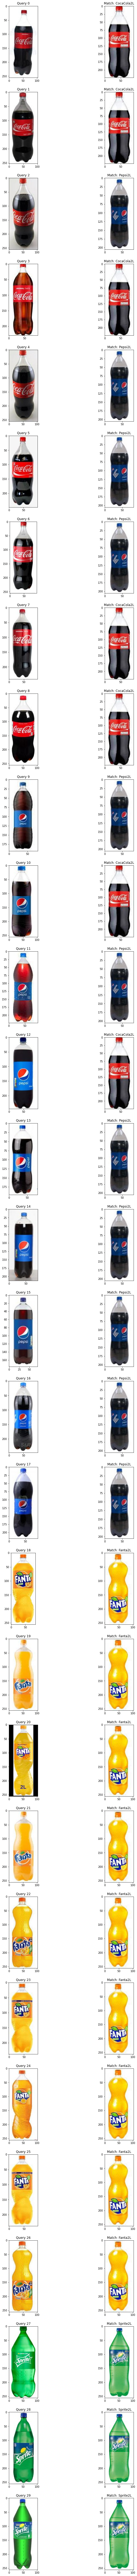

In [7]:
from lib.plots import plot_matches

plot_matches(gallery, queries, match_idxs, gallery_labels)

# Evaluate the results

TODO